<a href="https://colab.research.google.com/github/utsingh14/ids_data_analysis_project/blob/main/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IDS Project

Chandan Deb -- 22UCS052

Keshav Mittal -- 22UEC062

Shreedhar Goyal -- 22UEC128

Utkarsh Singh -- 22UCC111

Web Link: https://archive.ics.uci.edu/dataset/2/adult

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
original_data = pd.read_csv('/content/adult.data')
original_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


We observe that data provided doesn't include the headers(or features)

So we need to add columns for our better understanding + analysis

In [ ]:
dataset = pd.read_csv('adult.data',header=None)

# Columns provided in separate text file
dataset.columns = ['age','workclass','fnlwgt','education','education-num','marital-status',
                   'occupation','relationship','race','sex','capital-gain','capital-loss',
                   'hours-per-week','native-country','>50K']

print(type(dataset))
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dataset = dataset.drop('fnlwgt',axis=1)
dataset.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dataset.shape

(32561, 14)

In [ ]:
dataset.dtypes

,0
age,int64
workclass,object
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object
capital-gain,int64


In [ ]:
numerical_features = dataset.select_dtypes(include=['int64','float64'])
numerical_features

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
32556,27,12,0,0,38
32557,40,9,0,0,40
32558,58,9,0,0,40
32559,22,9,0,0,20


In [ ]:
categorical_features = dataset.select_dtypes(include=['object'])
categorical_features

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,>50K
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


Data Pre-processing

1) Handling missing values

In [ ]:
# Clearly defining which are the missing values
dataset = dataset.map(lambda x: pd.NA if isinstance(x, str) and x.strip() == "?"
                      else x.strip() if isinstance(x,str) else x)

# Replacing the "?" with NA value for missing
dataset.replace("?",pd.NA,inplace=True)

missing_vals = dataset.isna().sum()
print(type(missing_vals))
missing_vals

<class 'pandas.core.series.Series'>


,0
age,0
workclass,1836
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0
capital-gain,0


Native-Country feature has a small number of missing values(<2%) and hence can be dropped.

In [ ]:
dataset.dropna(subset=['native-country'],inplace=True)

In [ ]:
dataset.isna().sum()

,0
age,0
workclass,1809
education,0
education-num,0
marital-status,0
occupation,1816
relationship,0
race,0
sex,0
capital-gain,0


In [ ]:
dataset['workclass'].mode()[0]

'Private'

In [ ]:
workclass_percent = (dataset['workclass'].value_counts()/len(dataset['workclass']))*100
workclass_percent

,count
workclass,
Private,69.691663
Self-emp-not-inc,7.814748
Local-gov,6.463819
State-gov,3.999625
Self-emp-inc,3.358559
Federal-gov,2.948902
Without-pay,0.043780
Never-worked,0.021890


Workclass is overwhelmingly private job oriented.. Missing values can be replaced by mode

In [ ]:
dataset['workclass'].fillna(dataset['workclass'].mode()[0],inplace=True)

<ipython-input-14-17d9e1767521>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['workclass'].fillna(dataset['workclass'].mode()[0],inplace=True)


In [ ]:
dataset.isna().sum()

,0
age,0
workclass,0
education,0
education-num,0
marital-status,0
occupation,1816
relationship,0
race,0
sex,0
capital-gain,0


In [ ]:
dataset['occupation'].mode()[0]

'Prof-specialty'

In [ ]:
dataset['occupation'].value_counts()

,count
occupation,
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584
Other-service,3212
Machine-op-inspct,1966
Transport-moving,1572
Handlers-cleaners,1350


In [ ]:
occupation_percent = (dataset['occupation'].value_counts()/len(dataset['occupation']))*100
occupation_percent

,count
occupation,
Prof-specialty,12.627431
Craft-repair,12.602414
Exec-managerial,12.483582
Adm-clerical,11.636125
Sales,11.207705
Other-service,10.044406
Machine-op-inspct,6.147977
Transport-moving,4.915880
Handlers-cleaners,4.221652


Since the data is almost equally distributed we cannot drop missing rows/ or replace it with mode of the feature..

We can use categorical-multivariable imputation OR SimpleImputer for randomly filling occupations


first we apply label encoder to convert categorial data into numerical data

In [ ]:

from sklearn.preprocessing import LabelEncoder

def convert_categorical_to_numerical(df, categorical_features):
  """Converts categorical features in a Pandas DataFrame to numerical using Label Encoding.

  Args:
    df: The Pandas DataFrame.
    categorical_features: A list of column names representing categorical features.

  Returns:
    None. Modifies the DataFrame in place.
  """
  for feature in categorical_features:
      le = LabelEncoder()
      df[feature] = le.fit_transform(df[feature])

# Assuming 'dataset' is your DataFrame and you have a list of categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex', 'native-country', '>50K', 'occupation']
convert_categorical_to_numerical(dataset, categorical_features)

# Now your 'dataset' DataFrame will have numerical representations for the specified categorical features

In [ ]:
dataset

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,11,9,4,0,3,4,1,0,0,20,38,0


now we will apply knn impute to fill null occupations

In [ ]:

from sklearn.impute import KNNImputer

# Assuming 'dataset' is your DataFrame and all categorical features are already numerical

# 1. Create a copy of the dataset to avoid modifying the original (optional but recommended)
data_imputed = dataset.copy()

# 2. Apply KNN imputation to 'occupation'
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
data_imputed['occupation'] = imputer.fit_transform(data_imputed[['occupation']])

# 3. Replace missing values in the original dataset
dataset['occupation'] = dataset['occupation'].fillna(data_imputed['occupation'])

all null values are removed

In [ ]:
dataset.isna().sum()

,0
age,0
workclass,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


finding outliners of numerical features

In [ ]:


# Assuming 'dataset' is your DataFrame
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']  # Replace with your numerical features

def find_outliers_iqr(data, column):
    """Finds outliers in a numerical column using the IQR method.

    Args:
        data: The DataFrame.
        column: The name of the numerical column.

    Returns:
        A DataFrame containing the outlier values.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers in each numerical feature
for feature in numerical_features:
    outliers = find_outliers_iqr(dataset, feature)
    print(f"Outliers in '{feature}':\n{outliers}\n")

Outliers in 'age':
       age  workclass  education  education-num  marital-status  occupation  \
74      79          3         15             10               2           9   
222     90          3         11              9               4           7   
430     80          3         11              9               6          14   
918     81          5         11              9               2           3   
1040    90          3         11              9               4           7   
...    ...        ...        ...            ...             ...         ...   
31855   82          5         11              9               2           4   
32277   90          3         11              9               6           0   
32367   90          1          5              4               2          10   
32459   85          3          9             13               2           3   
32494   82          3         11              9               4          14   

       relationship  race  sex  

managing outliers

In [ ]:


# Assuming 'dataset' is your DataFrame

# 1. Capping for 'capital-gain' and 'capital-loss' (as before)
for feature in ['capital-gain', 'capital-loss']:
    upper_limit = dataset[feature].quantile(0.95)
    dataset[feature] = np.clip(dataset[feature], 0, upper_limit)



# 3. Managing Outliers in 'age', 'education-num', and 'hours-per-week'

# a) Winsorizing for 'age' and 'hours-per-week'
for feature in ['age', 'hours-per-week']:
    lower_limit = dataset[feature].quantile(0.05)
    upper_limit = dataset[feature].quantile(0.95)
    dataset[feature] = np.clip(dataset[feature], lower_limit, upper_limit)



outliers are managed

normalize using standardscaler

In [ ]:

from sklearn.preprocessing import StandardScaler

# Assuming 'dataset' is your DataFrame and numerical_features is defined

# 1. Create a StandardScaler object
scaler = StandardScaler()

# 2. Fit the scaler to your numerical data
scaler.fit(dataset[numerical_features])

# 3. Transform the numerical data
dataset[numerical_features] = scaler.transform(dataset[numerical_features])


In [ ]:
dataset

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,0.055378,6,9,1.143768,4,0,1,4,1,1.494174,0.0,-0.025473,38,0
1,0.912459,5,9,1.143768,2,3,0,4,1,-0.288988,0.0,-2.180193,38,0
2,-0.022538,3,11,-0.418349,0,5,1,4,1,-0.288988,0.0,-0.025473,38,0
3,1.146208,3,1,-1.199408,2,5,0,2,1,-0.288988,0.0,-0.025473,38,0
4,-0.801703,3,9,1.143768,2,9,5,2,0,-0.288988,0.0,-0.025473,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.879619,3,7,0.753239,2,12,5,4,0,-0.288988,0.0,-0.221357,38,0
32557,0.133295,3,11,-0.418349,2,6,0,4,1,-0.288988,0.0,-0.025473,38,1
32558,1.535791,3,11,-0.418349,6,0,4,4,0,-0.288988,0.0,-0.025473,38,0
32559,-1.269201,3,11,-0.418349,4,0,3,4,1,-0.288988,0.0,-1.984309,38,0


above output in dataset is normalized

shape of dataset  after preprocessing

In [ ]:
dataset.shape

(31978, 14)

earlier size was (32561,14)  now it is(31978,14) there is size change because we dropped some row having null values

2nd part 	Calculate basic descriptive statistics like mean, median, mode, standard deviation, and variance for the numerical features.

In [ ]:
descriptive_stats = dataset[numerical_features].agg(['mean', 'median', lambda x: x.mode()[0] if not x.mode().empty else np.nan, 'std', 'var'])
print(descriptive_stats)

                   age  education-num  capital-gain  capital-loss  \
mean     -6.954778e-17  -3.355180e-17  1.510942e-17           0.0   
median   -1.004547e-01  -2.781993e-02 -2.889882e-01           0.0   
<lambda>  1.925373e+00  -4.183493e-01 -2.889882e-01           0.0   
std       1.000016e+00   1.000016e+00  1.000016e+00           0.0   
var       1.000031e+00   1.000031e+00  1.000031e+00           0.0   

          hours-per-week  
mean       -2.973001e-16  
median     -2.547320e-02  
<lambda>   -2.547320e-02  
std         1.000016e+00  
var         1.000031e+00  


o	Create visualizations like histograms, bar charts, box plots, and scatter plots to get a better sense of the data.
o	Use correlation heatmaps to check how features are related to each other.
o	Use pair plots or scatter plots to visualize the relationship between the target variable and the features.


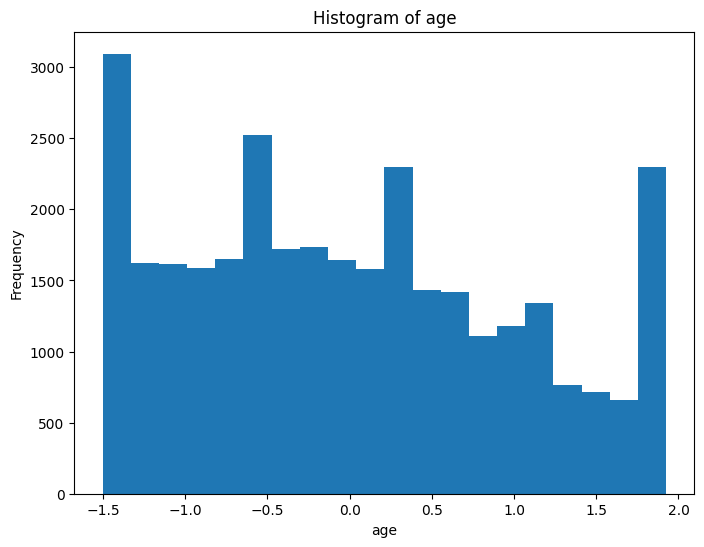

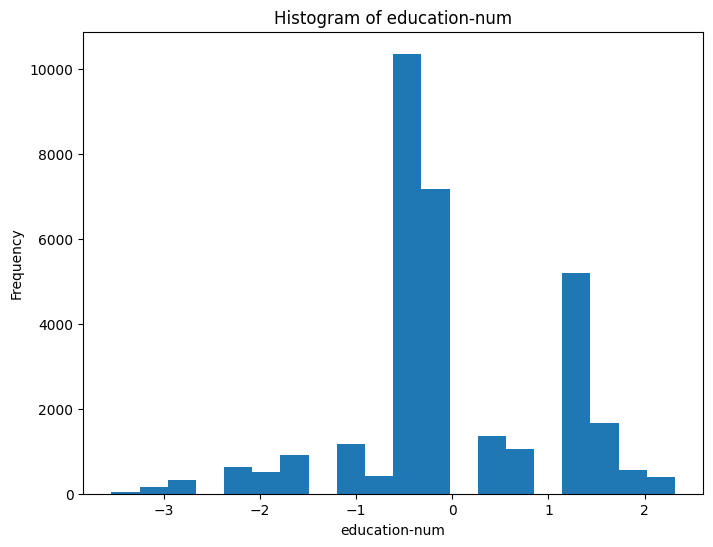

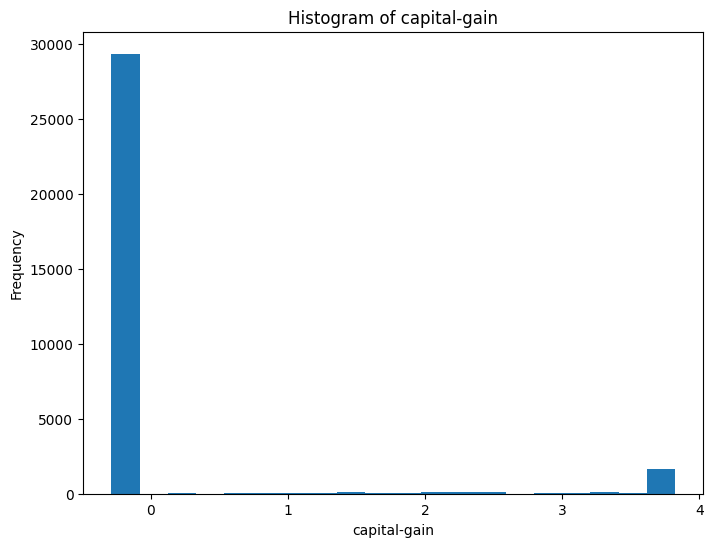

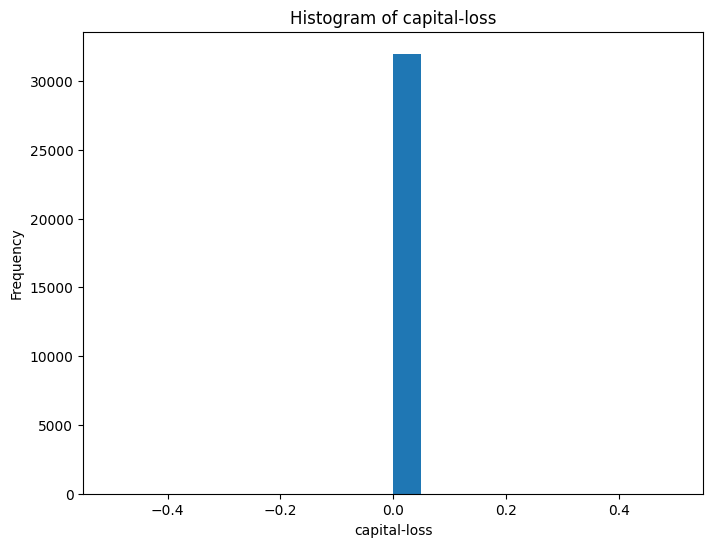

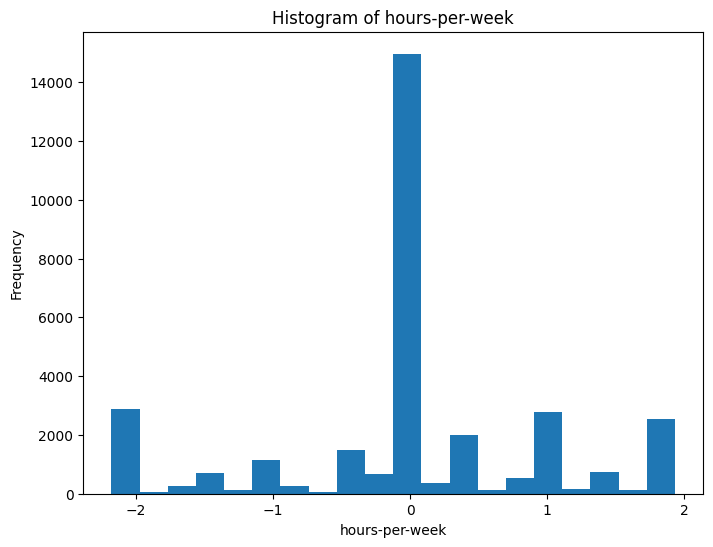

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is your DataFrame, numerical_features is defined, and '>50K' is your target variable

# 1. Histograms for Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.hist(dataset[feature], bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()





# 5. Pair Plot (Optional - for visualizing relationships between all numerical features)
# sns.pairplot(dataset[numerical_features + ['>50K']])  # Include target variable
# plt.show()

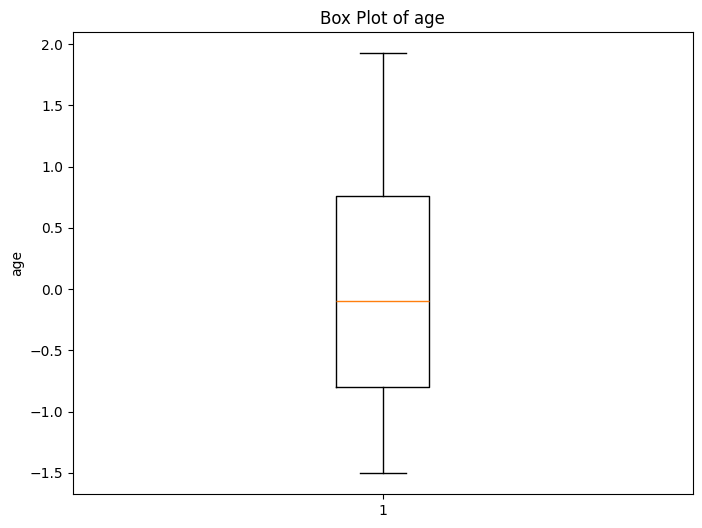

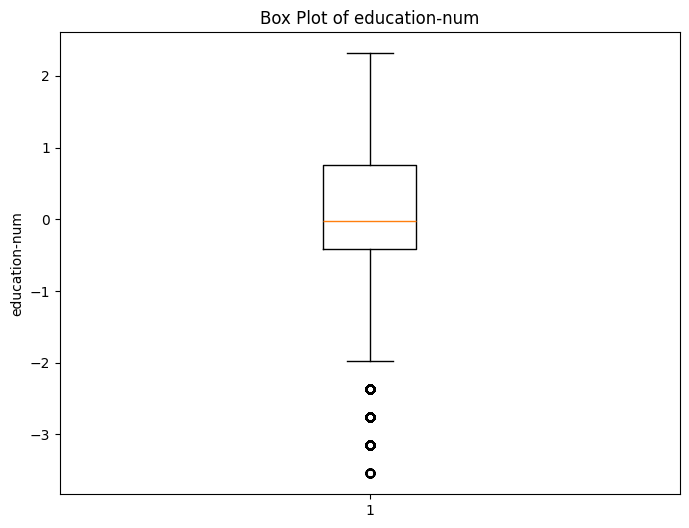

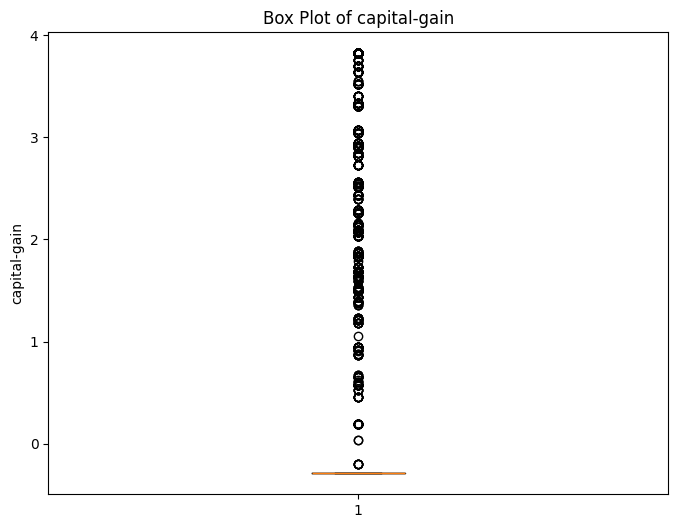

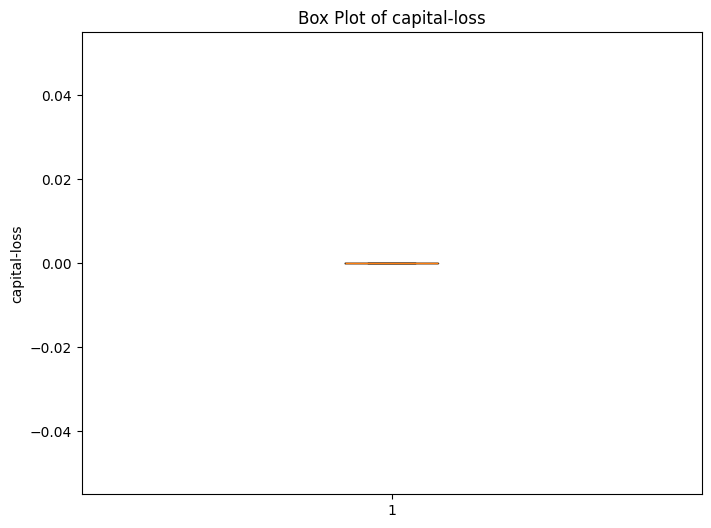

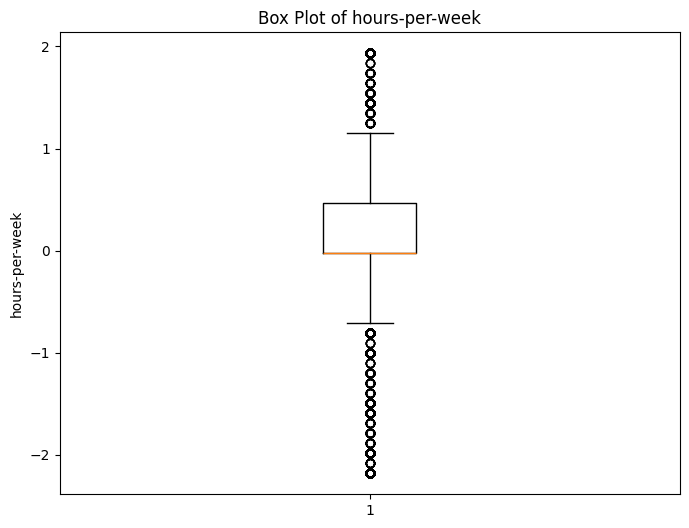

In [ ]:
# 2. Box Plots for Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(dataset[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

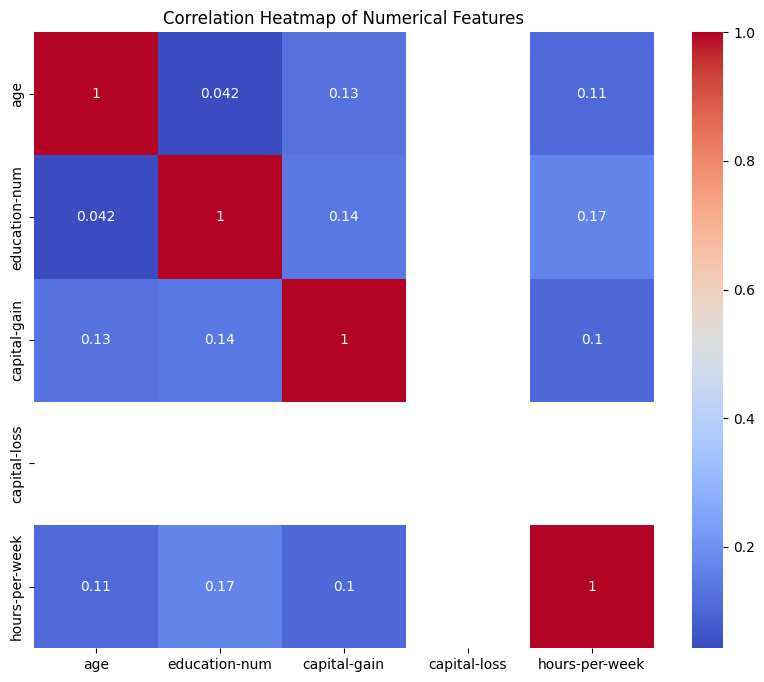

In [ ]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = dataset[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


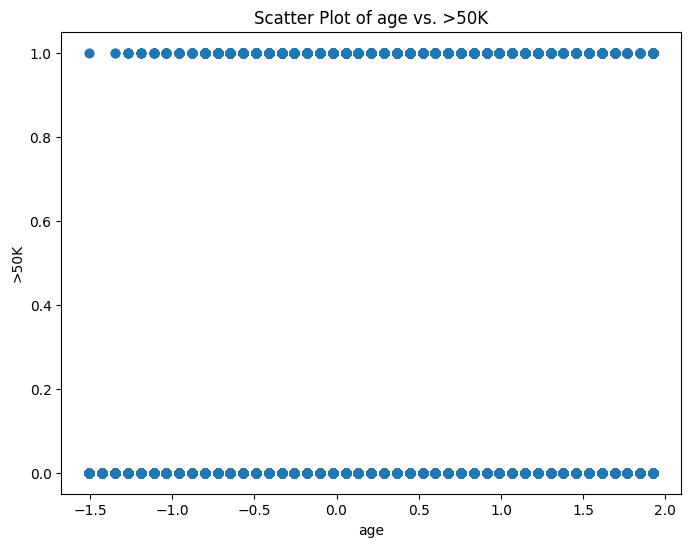

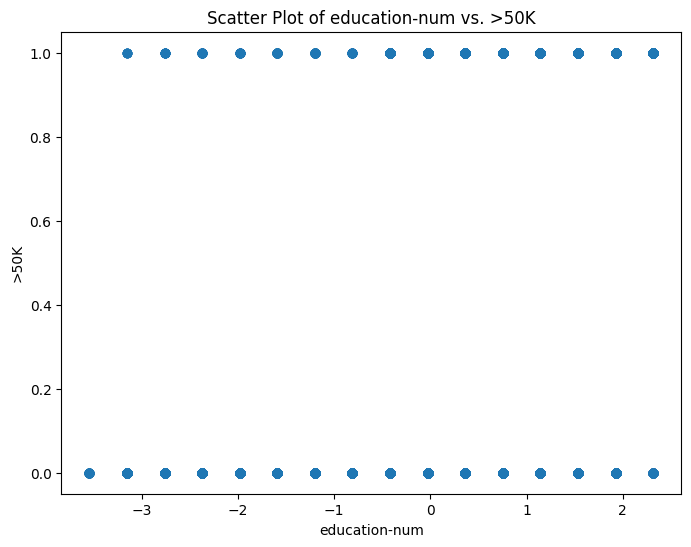

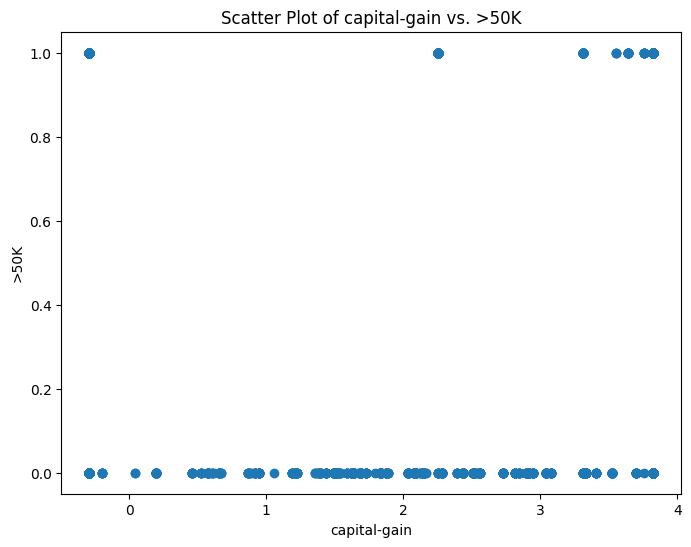

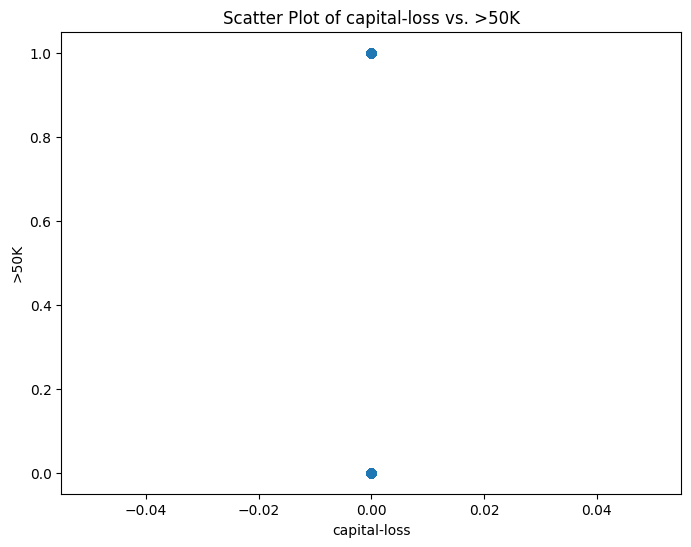

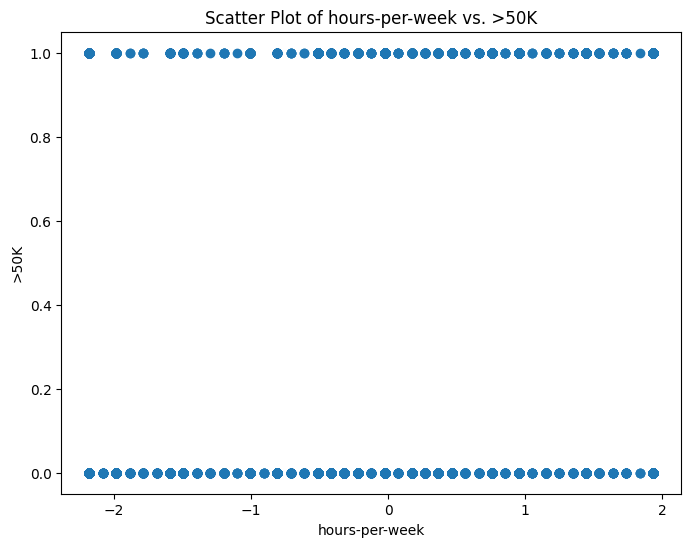

In [ ]:

# 4. Scatter Plots (Target Variable vs. Numerical Features)
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset[feature], dataset['>50K'])
    plt.title(f'Scatter Plot of {feature} vs. >50K')
    plt.xlabel(feature)
    plt.ylabel('>50K')
    plt.show()

•	Univariate and Bivariate Analysis:
o	Perform univariate analysis (analyzing individual variables) and bivariate analysis (exploring relationships between two variables).



Descriptive Statistics for age:
count    3.197800e+04
mean    -6.954778e-17
std      1.000016e+00
min     -1.502951e+00
25%     -8.017027e-01
50%     -1.004547e-01
75%      7.566262e-01
max      1.925373e+00
Name: age, dtype: float64



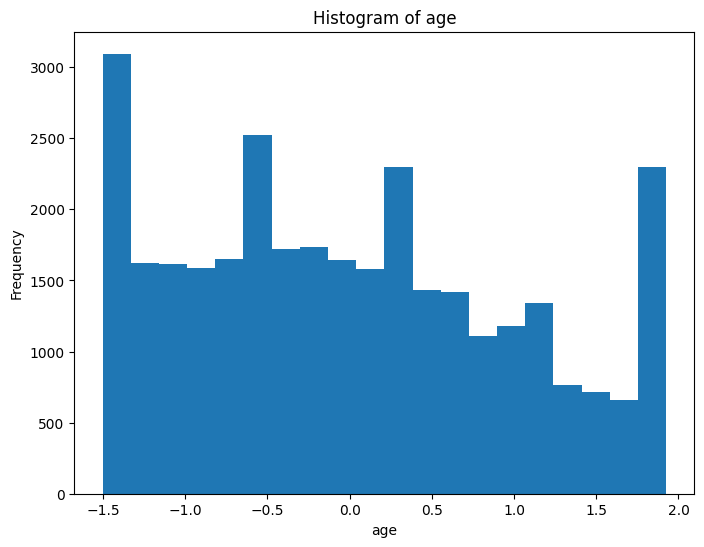

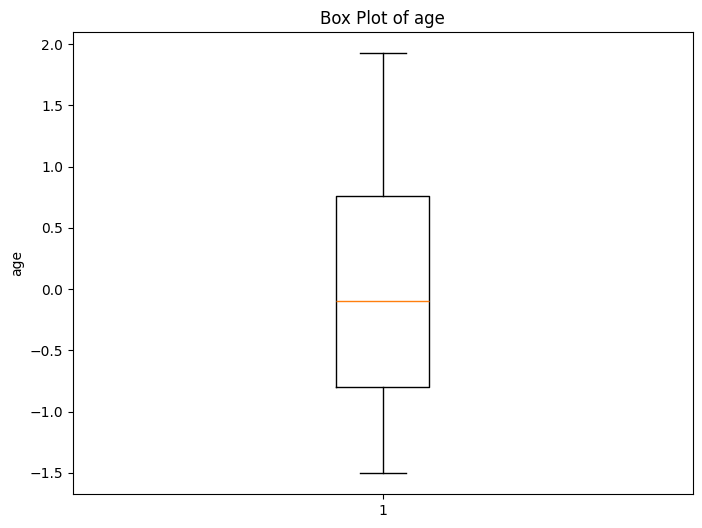

Descriptive Statistics for education-num:
count    3.197800e+04
mean    -3.355180e-17
std      1.000016e+00
min     -3.542584e+00
25%     -4.183493e-01
50%     -2.781993e-02
75%      7.532387e-01
max      2.315356e+00
Name: education-num, dtype: float64



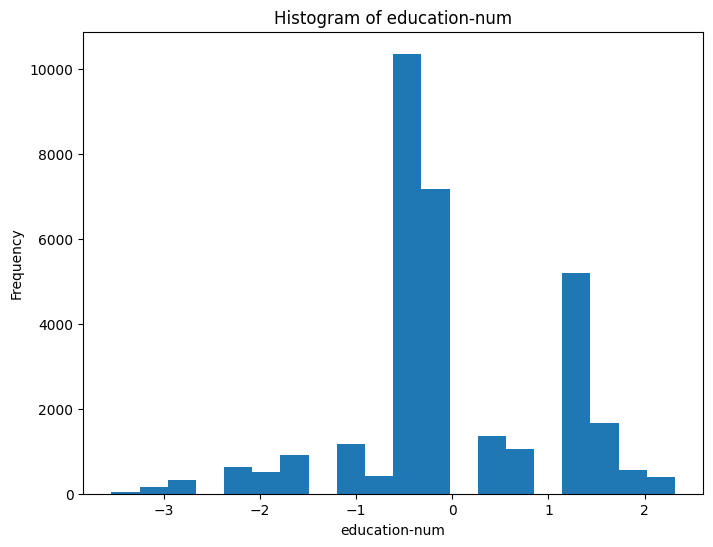

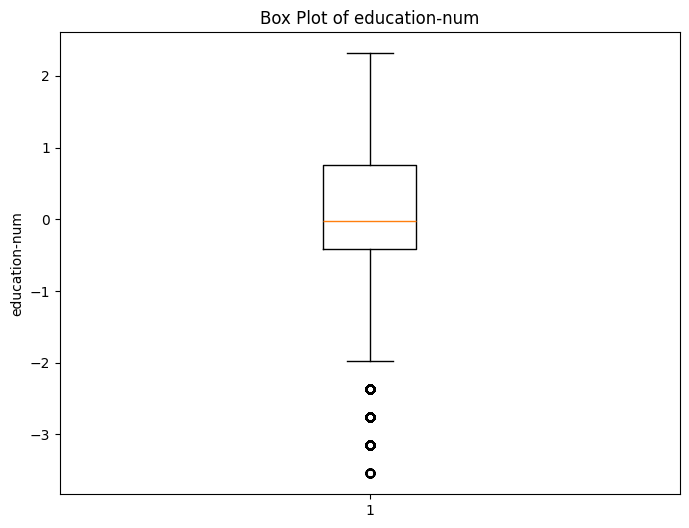

Descriptive Statistics for capital-gain:
count    3.197800e+04
mean     1.510942e-17
std      1.000016e+00
min     -2.889882e-01
25%     -2.889882e-01
50%     -2.889882e-01
75%     -2.889882e-01
max      3.822783e+00
Name: capital-gain, dtype: float64



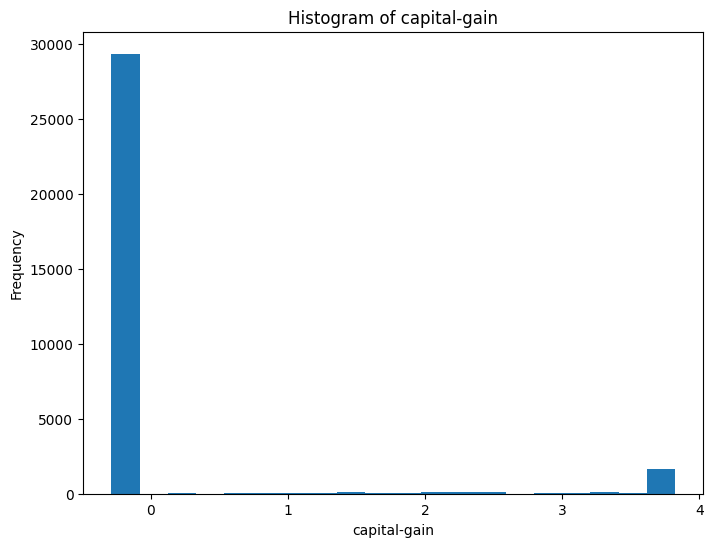

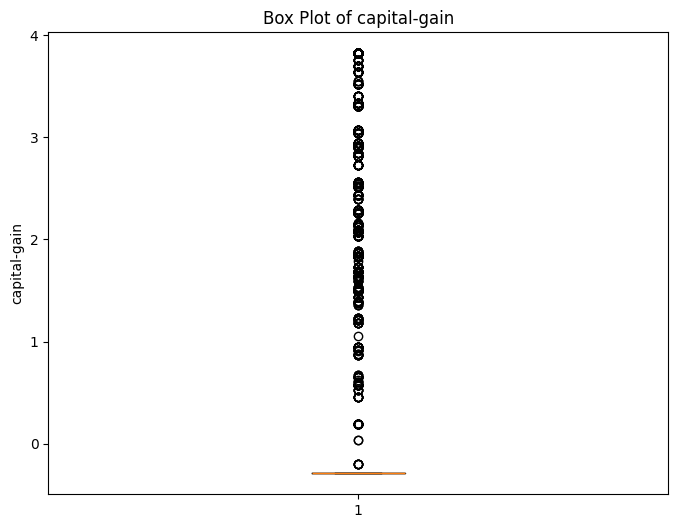

Descriptive Statistics for capital-loss:
count    31978.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: capital-loss, dtype: float64



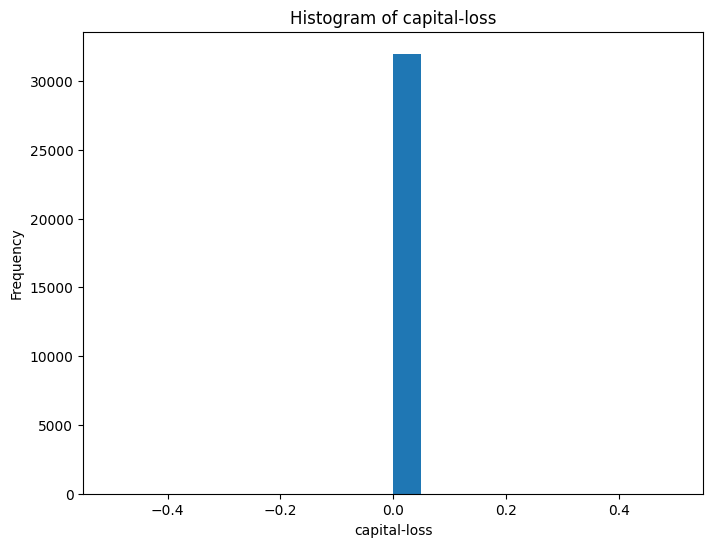

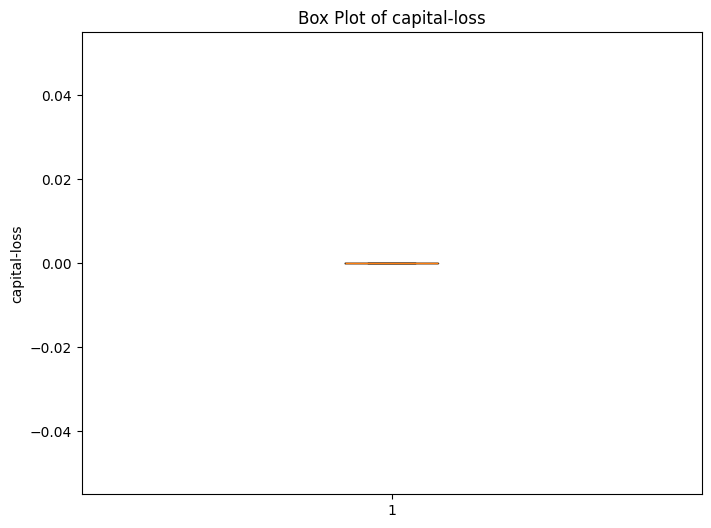

Descriptive Statistics for hours-per-week:
count    3.197800e+04
mean    -2.973001e-16
std      1.000016e+00
min     -2.180193e+00
25%     -2.547320e-02
50%     -2.547320e-02
75%      4.642359e-01
max      1.933363e+00
Name: hours-per-week, dtype: float64



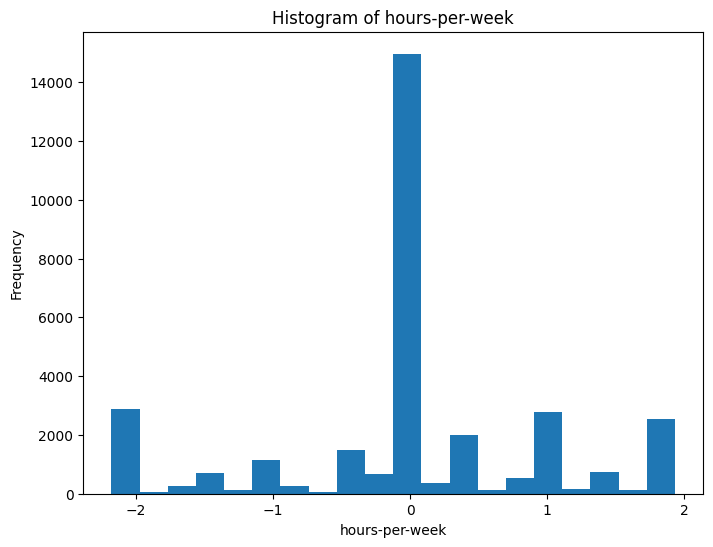

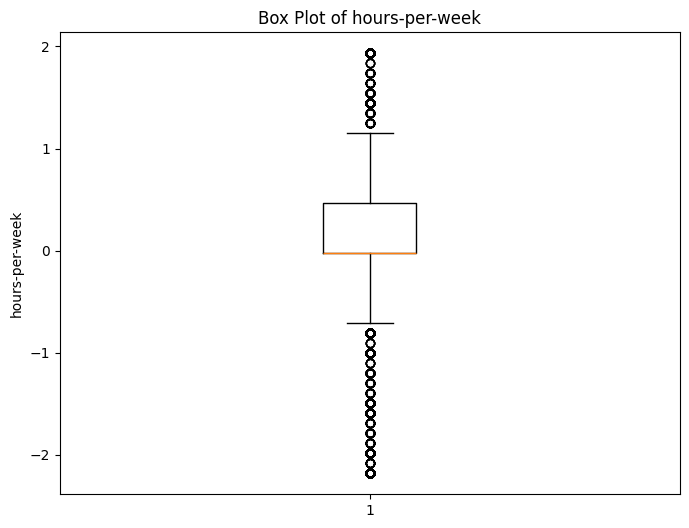

Frequency Table for workclass:
workclass
3    24095
5     2499
1     2067
6     1279
4     1074
0      943
7       14
2        7
Name: count, dtype: int64



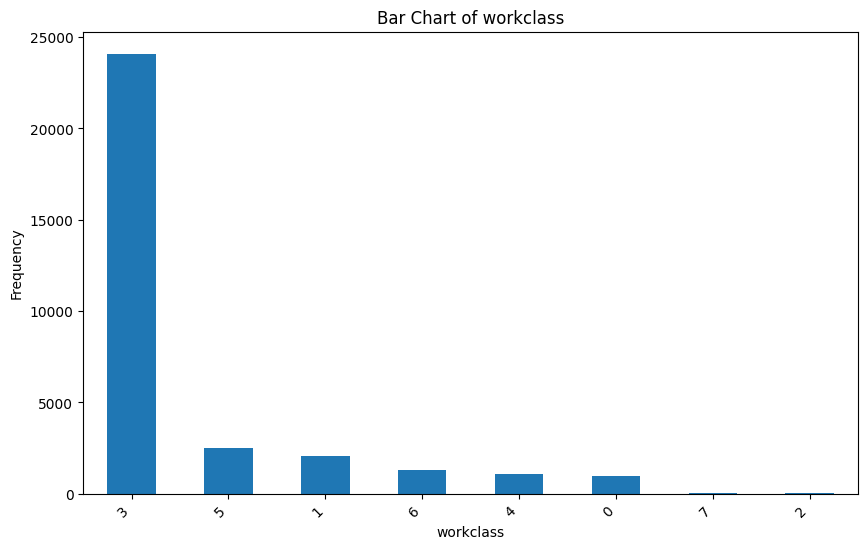

Frequency Table for education:
education
11    10368
15     7187
9      5210
12     1674
8      1366
1      1167
7      1055
0       921
5       627
14      559
6       506
2       417
10      390
4       318
3       163
13       50
Name: count, dtype: int64



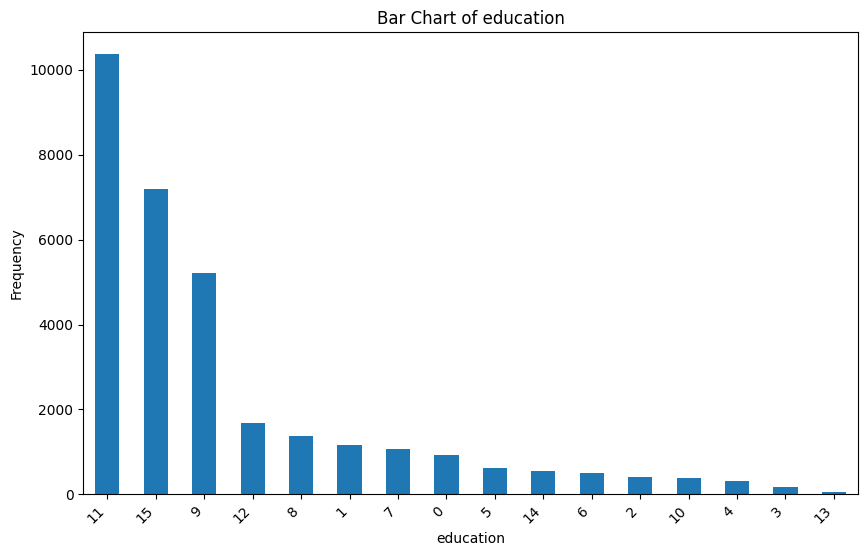

Frequency Table for marital-status:
marital-status
2    14692
4    10488
0     4394
5     1005
6      979
3      397
1       23
Name: count, dtype: int64



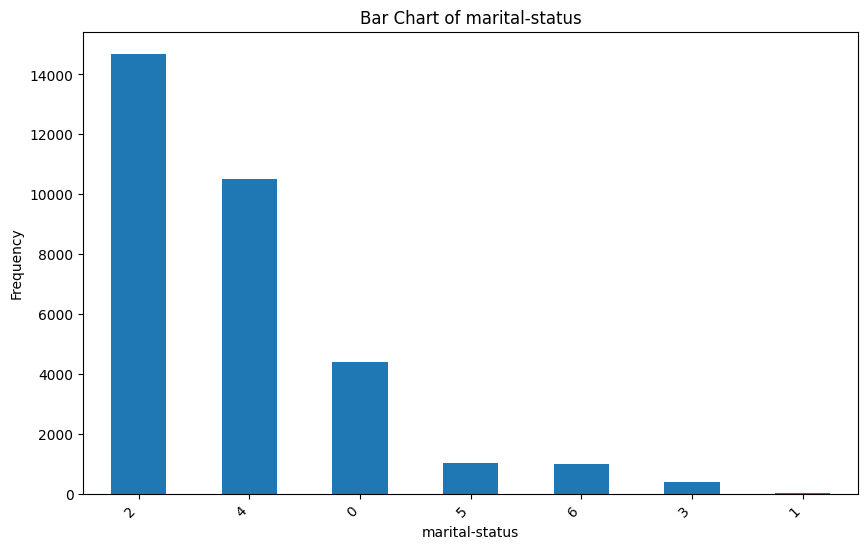

Frequency Table for relationship:
relationship
0    12947
1     8156
3     5005
4     3384
5     1534
2      952
Name: count, dtype: int64



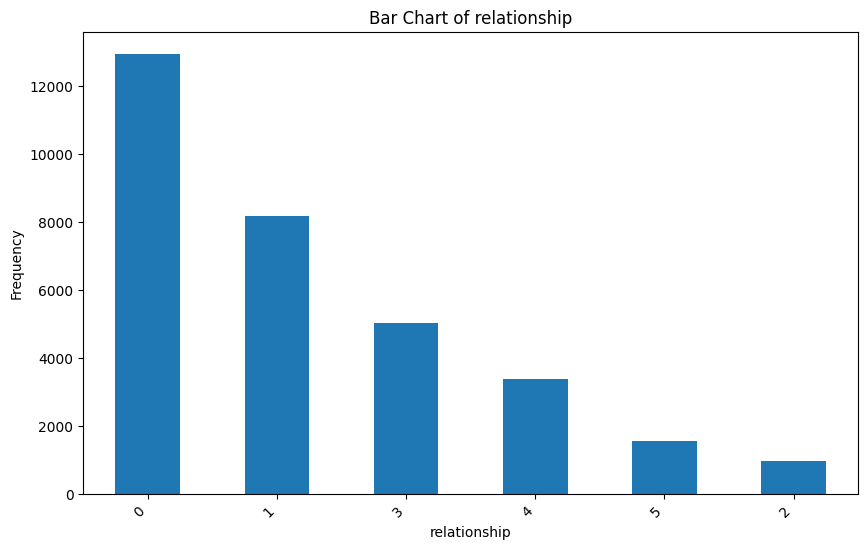

Frequency Table for race:
race
4    27430
2     3028
1      956
0      311
3      253
Name: count, dtype: int64



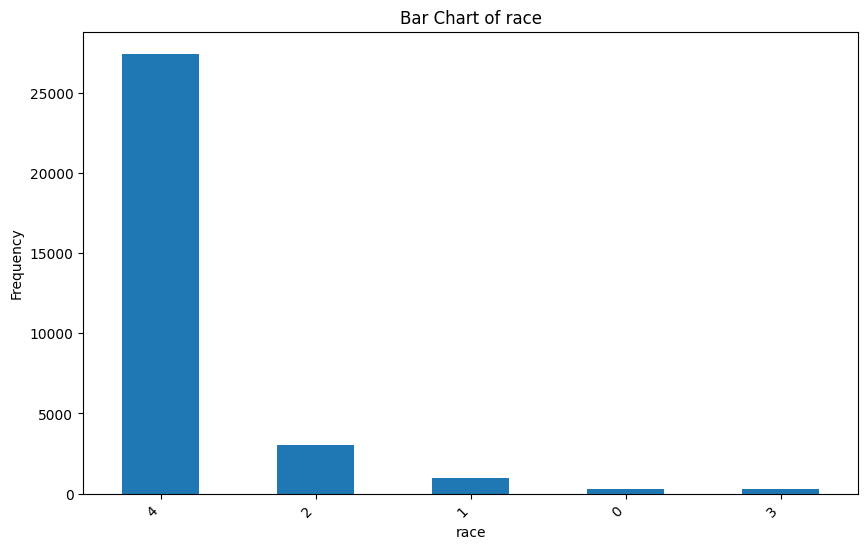

Frequency Table for sex:
sex
1    21370
0    10608
Name: count, dtype: int64



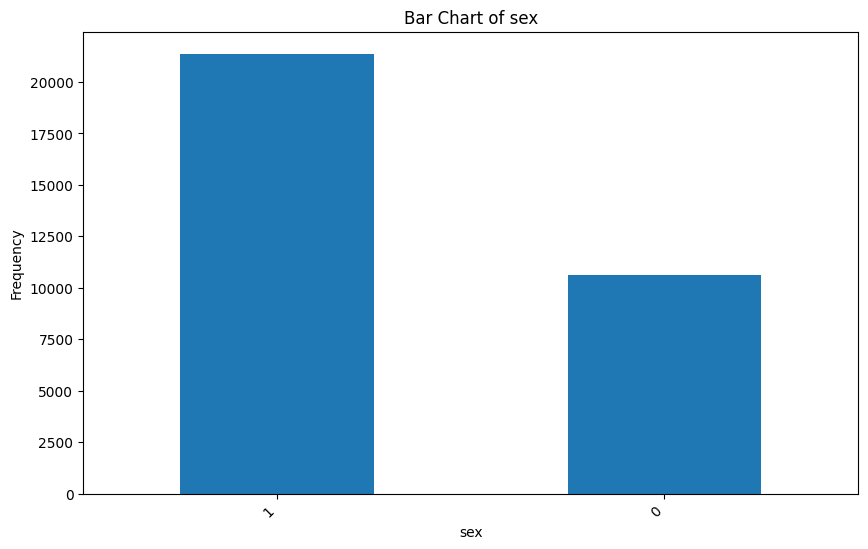

Frequency Table for native-country:
native-country
38    29170
25      643
29      198
10      137
1       121
32      114
7       106
18      100
4        95
8        90
22       81
34       80
2        75
21       73
5        70
39       67
12       64
23       62
30       60
3        59
35       51
13       44
19       43
31       37
26       34
28       31
9        29
11       29
6        28
20       24
16       20
0        19
37       19
24       18
36       18
40       16
27       14
15       13
17       13
33       12
14        1
Name: count, dtype: int64



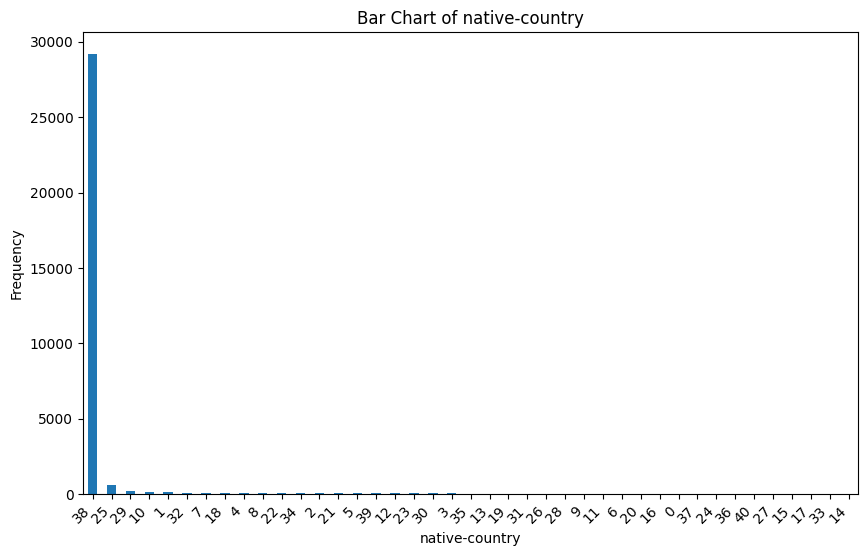

Frequency Table for >50K:
>50K
0    24283
1     7695
Name: count, dtype: int64



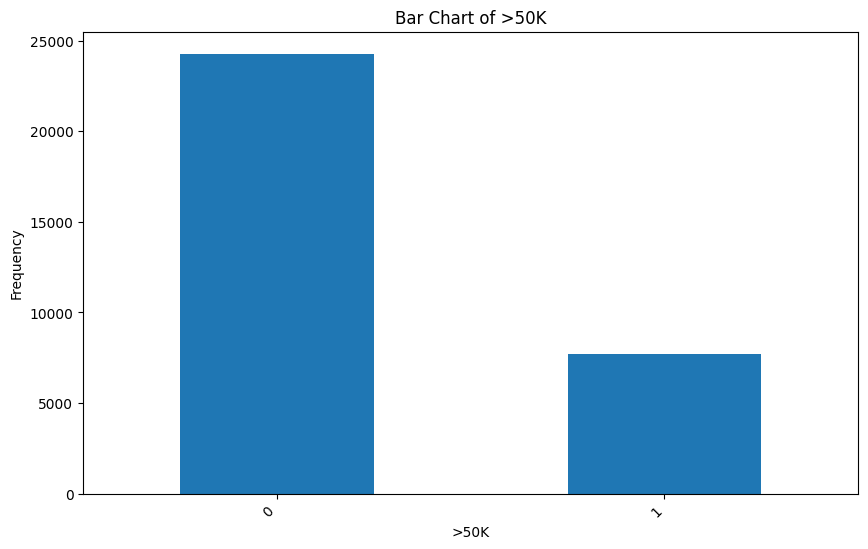

Frequency Table for occupation:
occupation
9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1966
14    1816
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: count, dtype: int64



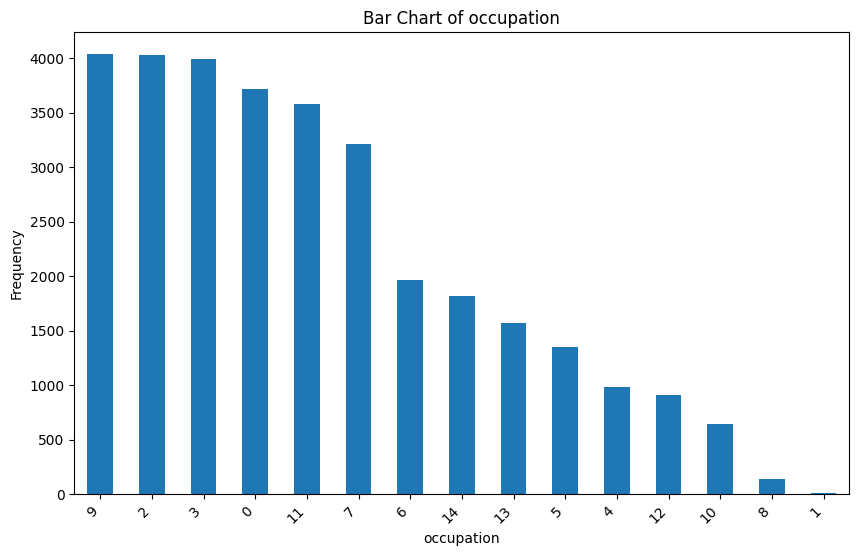

In [ ]:


# Assuming 'dataset' is your DataFrame
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex', 'native-country', '>50K', 'occupation']

# 1. Univariate Analysis for Numerical Features
for feature in numerical_features:
    # Descriptive Statistics
    print(f"Descriptive Statistics for {feature}:\n{dataset[feature].describe()}\n")

    # Histogram
    plt.figure(figsize=(8, 6))
    plt.hist(dataset[feature], bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(dataset[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.show()

# 2. Univariate Analysis for Categorical Features
for feature in categorical_features:
    # Frequency Table
    print(f"Frequency Table for {feature}:\n{dataset[feature].value_counts()}\n")

    # Bar Chart
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    dataset[feature].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

bivariate analysis

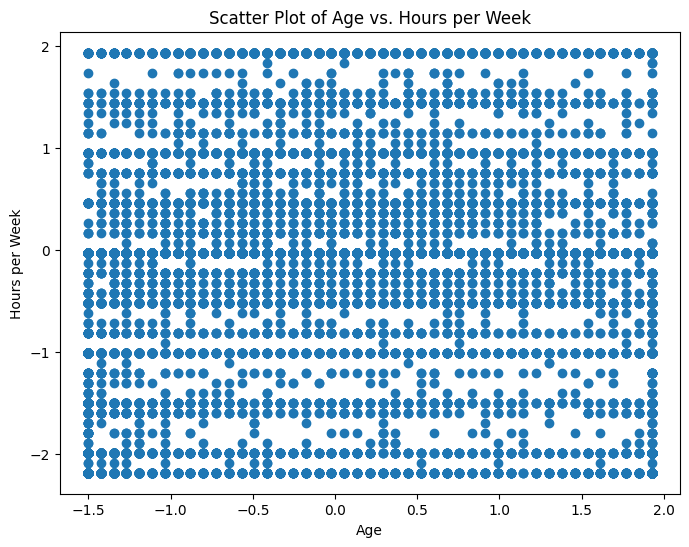

Correlation between Age and Hours per Week: 0.10947898636201027

Cross-Tabulation of Education vs. Sex:
sex           0     1
education            
0           291   630
1           431   736
2           140   277
3            46   117
4            79   239
5           154   473
6           143   363
7           415   640
8           492   874
9          1585  3625
10           82   308
11         3350  7018
12          524  1150
13           16    34
14           89   470
15         2771  4416



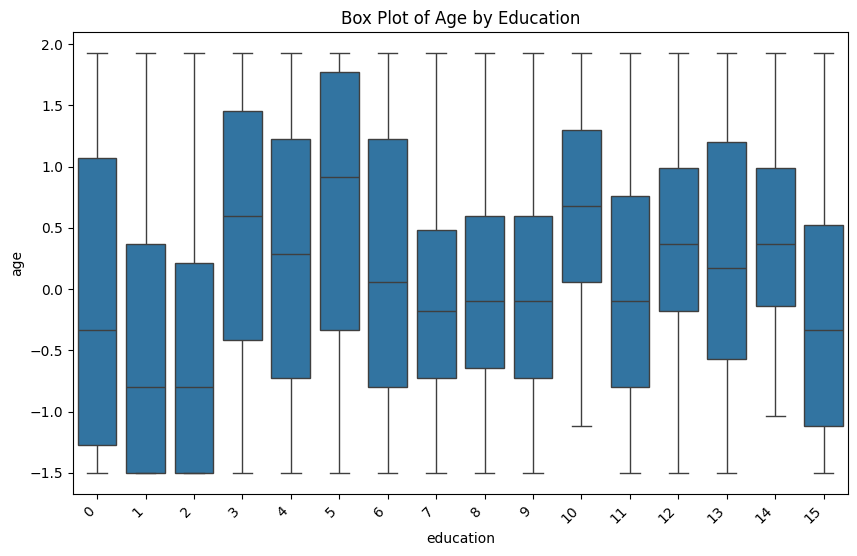

In [ ]:


# Assuming 'dataset' is your DataFrame
numerical_features = ['age', 'hours-per-week']  # Selecting two numerical features
categorical_features = ['education', 'sex']  # Selecting two categorical features

# 1. Numerical vs. Numerical
# Example: 'age' vs. 'hours-per-week'
plt.figure(figsize=(8, 6))
plt.scatter(dataset['age'], dataset['hours-per-week'])
plt.title('Scatter Plot of Age vs. Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

correlation = dataset['age'].corr(dataset['hours-per-week'])
print(f"Correlation between Age and Hours per Week: {correlation}\n")

# 2. Categorical vs. Categorical
# Example: 'education' vs. 'sex'
cross_tab = pd.crosstab(dataset['education'], dataset['sex'])
print(f"Cross-Tabulation of Education vs. Sex:\n{cross_tab}\n")

# Stacked Bar Chart (Optional)
# cross_tab.plot(kind='bar', stacked=True)
# plt.title('Stacked Bar Chart of Education vs. Sex')
# plt.xlabel('Education')
# plt.ylabel('Frequency')
# plt.show()

# 3. Numerical vs. Categorical
# Example: 'age' vs. 'education'
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='age', data=dataset)
plt.title('Box Plot of Age by Education')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()

t-test
•	Hypothesis Testing (if applicable):Hypothesis: The average age of people earning more than 50K is higher than the average age of people earning less than or equal to 50K.

In [ ]:

from scipy import stats

# Assuming 'dataset' is your DataFrame and '>50K' is your target variable

# Separate data into two groups
group1 = dataset[dataset['>50K'] == 1]['age']  # Income > 50K
group2 = dataset[dataset['>50K'] == 0]['age']  # Income <= 50K

# Perform t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average age between the two income groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average age between the two income groups.")

T-statistic: 46.16436843592938
P-value: 0.0
Reject the null hypothesis. There is a significant difference in average age between the two income groups.


 anova test
 Hypothesis: The average hours per week worked differs significantly across different education levels.

In [ ]:


# Assuming 'dataset' is your DataFrame and '>50K' is your target variable

# Separate data into two groups
group1 = dataset[dataset['>50K'] == 1]['age']  # Income > 50K
group2 = dataset[dataset['>50K'] == 0]['age']  # Income <= 50K

# Perform t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average age between the two income groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average age between the two income groups.")

T-statistic: 46.16436843592938
P-value: 0.0
Reject the null hypothesis. There is a significant difference in average age between the two income groups.
